# High level Tensorflow model for MNIST/CIFAR10 classification
After completing the very low level Tensorflow tutorial, we will now implement the Keras approach


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Import all the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Importing and preprocessing the data
I will be using MNIST for this notebook. 
We can use Tensorflow-Keras with the command 'tf.keras.datasets.mnist.load_data()' and download the database online, or we can download it from:
https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
For more detailed information on the MNIST dataset, please refer to [LeCun et al., 1998a] Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998. Also please see http://yann.lecun.com/exdb/mnist/


In [3]:
# # Uncomment to use MNIST
# # (x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data('/tf/mydata/mnist.npz')

x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# It is a good idea to visualise the data we just loaded.
print('Train data shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


Train image shape:  (28, 28)


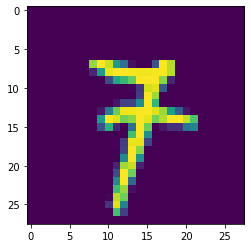

In [5]:
# So, as expected we have 60,000 training images and 10,0000 for testing. What is
# each image shape? Let's find out
print('Train image shape: ', x_train[1].shape)

# Knowing it is a matrix shape, we can randomly show any of the numbers
rnd_idx = np.random.randint(x_train.shape[0])
plt.imshow(x_train[rnd_idx]) #Using astype guarantess imshow work

## Using Keras Sequential

In this notebook I will show a super simple implementation using high level Keras with automatic eager execution.


In [6]:
# First, let's define the architecture of our FC networks.
# I will start with a 4-Layer vanilla (tasty) FC NN with ReLu activations, weight decay regularization (L2),
# using the number of hidden units given in, well, hidden_units

def four_layer_FC(hidden_units):
    model = tf.keras.models.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28, 28)),
                            tf.keras.layers.Dense(hidden_units[0], activation='relu'),
                            tf.keras.layers.Dense(hidden_units[1], activation='relu'),
                            tf.keras.layers.Dense(hidden_units[2], activation='relu'),
                            tf.keras.layers.Dense(hidden_units[3], activation='softmax')
                            ])
    
    return model

In [7]:
hidden_units = [100, 100, 100, 10]
model = four_layer_FC(hidden_units)

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, batch_size = 128, epochs=10)


model.evaluate(x_test,  y_test, verbose=2)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 27us/sample - loss: 1.4351 - accuracy: 0.6286
Epoch 2/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.4878 - accuracy: 0.8681
Epoch 3/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.3724 - accuracy: 0.8935
Epoch 4/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.3281 - accuracy: 0.9056
Epoch 5/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2997 - accuracy: 0.9137
Epoch 6/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2779 - accuracy: 0.9198
Epoch 7/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2597 - accuracy: 0.9253
Epoch 8/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2435 - accuracy: 0.9304
Epoch 9/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2293 - accuracy: 0.9346
Epoch 10/10
60

[0.21206765420883894, 0.9372]

The predicted number is:  6


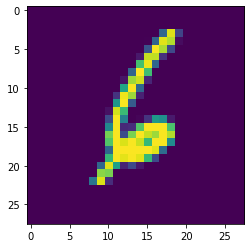

In [16]:
# Let us test the result
idx = np.random.randint(10000)

plt.imshow(x_test[idx])
print('The predicted number is: ', np.argmax(model.predict(x_test[idx].reshape(1,28,28))))

## Using Keras

In [17]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data('/tf/mydata/mnist.npz')

x_train, x_test = x_train / 255.0, x_test / 255.0

In [28]:
batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(60000).batch(batch_size)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

In [19]:
# First let us define the architecture

class four_layer_FC2(tf.keras.Model):
    def __init__(self, hidden_units):
        super().__init__()
        initialiser = tf.keras.initializers.he_normal(seed=None)
        self.flatten_layer = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(units=hidden_units[0], 
                                         activation='relu', 
                                         kernel_initializer=initialiser)
        self.fc2 = tf.keras.layers.Dense(units=hidden_units[1], 
                                         activation='relu', 
                                         kernel_initializer=initialiser)
        self.fc3 = tf.keras.layers.Dense(units=hidden_units[2], 
                                         activation='relu',
                                         kernel_initializer=initialiser)
        self.probs = tf.keras.layers.Dense(units=hidden_units[3],
                                          activation='softmax')
        
    def call(self, x):
        x = self.flatten_layer(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.probs(x)
        
        return x

hidden_units = [100, 100, 100, 10]
def test_4_layer(hidden_units):
    x = tf.zeros((64, 28, 28))
    probabilities = four_layer_FC2(hidden_units)(x)
    print(probabilities.shape)
    
test_4_layer(hidden_units)

(64, 10)


In [20]:
# Create the model
model = four_layer_FC2(hidden_units)

In [24]:
# Let define the loss and optimization approach
loss_ = tf.keras.losses.SparseCategoricalCrossentropy()
optimiser = tf.keras.optimizers.Adam()
# optimiser = tf.keras.optimizers.SGD()

# Define the metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [25]:
# Now define the training step function
''' With automatic differentiation Tf uses tapes
Tensorflow "records" all operations executed inside the context of a tf.GradientTape onto a "tape". 
Tensorflow then uses that tape and the gradients associated with each recorded operation to compute the 
gradients of a "recorded" computation using reverse mode differentiation.'''
def train_FC_model(x, y):
    with tf.GradientTape() as tape:
        preds = model(x)
        loss = loss_(y, preds)
    grads = tape.gradient(loss, model.trainable_variables)
    optimiser.apply_gradients(zip(grads, model.trainable_variables))

    train_loss(loss)
    train_accuracy(y, preds)   


In [26]:
def test_step(x, y):
    preds = model(x)
    t_loss = loss_(y, preds)

    test_loss(t_loss)
    test_accuracy(y, preds)

In [29]:
total_epochs = 5
print_every = 100
for epoch in range(total_epochs):
    
    print('Epoch number:', epoch)                        
    
    for iteration, (x, y) in enumerate(train_ds):
        train_FC_model(x, y)
       
        if iteration % print_every == 0:
            for test_images, test_labels in test_ds:
                test_step(test_images, test_labels)
            print('Iteration: %d Loss: %f Train Accuracy: %f Test Accuray: %f' 
                 %(iteration, train_loss.result(), train_accuracy.result(), test_accuracy.result()))

  # Reset metrics
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

Epoch number: 0
Iteration: 0 Loss: 0.015844 Train Accuracy: 0.994141 Test Accuray: 0.975700
Iteration: 100 Loss: 0.008404 Train Accuracy: 0.997757 Test Accuray: 0.978050
Epoch number: 1
Iteration: 0 Loss: 0.002882 Train Accuracy: 1.000000 Test Accuray: 0.980500
Iteration: 100 Loss: 0.004485 Train Accuracy: 0.999130 Test Accuray: 0.980550
Epoch number: 2
Iteration: 0 Loss: 0.002756 Train Accuracy: 1.000000 Test Accuray: 0.980200
Iteration: 100 Loss: 0.003285 Train Accuracy: 0.999555 Test Accuray: 0.980400
Epoch number: 3
Iteration: 0 Loss: 0.002738 Train Accuracy: 1.000000 Test Accuray: 0.981000
Iteration: 100 Loss: 0.002582 Train Accuracy: 0.999710 Test Accuray: 0.980700
Epoch number: 4
Iteration: 0 Loss: 0.004156 Train Accuracy: 1.000000 Test Accuray: 0.979900
Iteration: 100 Loss: 0.002137 Train Accuracy: 0.999787 Test Accuray: 0.979900


The predicted number is:  8


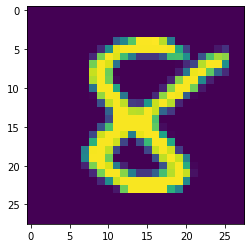

In [34]:
# Let us test the result
idx = np.random.randint(10000)

plt.imshow(x_test[idx])
print('The predicted number is: ', np.argmax(model.predict(x_test[idx].reshape(1,28,28))))